In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("Alpha-Thalassemia.csv")
dataset

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,1,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.00,33.00,309.0,88.50,2.60,0.11,1
1,0,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.40,43.10,687.0,87.80,2.40,0.90,1
2,1,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.00,33.00,309.0,88.50,2.60,0.10,1
3,0,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.00,50.00,334.0,86.80,2.80,0.30,1
4,0,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.00,30.00,596.0,86.30,2.40,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0,15.5,45.9,5.19,88.4,29.9,33.8,12.6,8.8,47.57,40.98,177.0,88.60,3.20,0.40,0
199,1,10.4,33.3,4.93,67.6,21.1,31.2,14.8,8.9,44.50,45.50,295.0,88.00,2.40,0.50,0
200,0,9.8,29.8,4.75,62.7,19.0,30.4,14.7,7.2,48.20,41.50,262.0,85.10,2.40,1.10,0
201,0,11.2,37.2,5.43,68.5,20.6,30.1,15.1,12.0,13.50,76.80,277.0,86.52,2.59,0.77,0


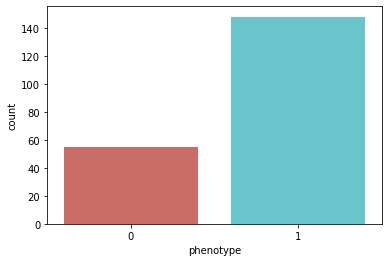

In [3]:
sns.countplot(x='phenotype',data=dataset,palette='hls')
plt.show()

In [4]:
X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].values
y = dataset.iloc[:, 15].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify = y, random_state = 0)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (142, 15)
X_test shape: (61, 15)
Y_train shape: (142,)
Y_test shape: (61,)


In [5]:
Xgeneric = pd.DataFrame(X_test)
ygeneric = pd.DataFrame(y_test)
data_baru = pd.concat([Xgeneric, ygeneric],  axis=1)
data_baru.columns = ['sex', 'hb', 'pcv','rbc', 'mcv', 'mch', 'mchc', 'rdw', 'wbc',
                     'neut', 'lymph', 'plt', 'hba', 'hba2', 'hbf', 'phenotype']
data_baru

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,0.0,14.1,40.6,5.80,91.6,24.3,33.4,13.6,8.9,47.6,41.0,275.5,85.80,2.60,1.00,1
1,0.0,13.9,45.3,4.95,80.7,18.6,30.7,14.9,7.3,66.2,28.5,236.0,84.70,2.90,0.50,1
2,0.0,12.5,38.0,4.55,83.4,27.4,32.9,13.4,9.5,44.5,45.5,208.0,87.70,2.50,0.20,1
3,0.0,14.3,45.6,5.56,82.0,25.7,31.3,15.3,15.5,50.0,45.0,254.0,84.86,2.68,0.54,0
4,0.0,13.7,43.6,5.05,86.3,27.1,31.4,14.2,12.4,52.8,36.0,296.0,87.10,2.60,0.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.0,10.2,32.1,4.05,79.3,25.1,31.7,16.1,10.2,72.0,21.0,248.0,90.00,2.20,0.60,1
57,0.0,11.4,39.1,4.98,69.5,22.9,32.9,16.0,12.5,38.6,50.3,392.0,88.00,2.20,0.40,1
58,0.0,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.0,50.0,334.0,86.80,2.80,0.30,1
59,1.0,13.6,41.2,5.22,78.9,26.1,33.0,14.5,5.8,44.5,45.5,256.0,89.20,2.80,0.30,1


In [5]:
pd.value_counts(y_train)

1    104
0     38
dtype: int64

In [6]:
pd.value_counts(y_test)

1    44
0    17
dtype: int64

# SMOTE

In [7]:
arr = np.array(y_train)
X_mayor = []
X_minor = []
y_mayor =[]
y_minor =[]
n = len(arr)

for i in range (len(arr)):
    if arr[i] == 1:
        X_mayor.append(np.array(X_train[i:i+1]))
        y_mayor.append(np.array(arr[i]))
    else:
        X_minor.append(np.array(X_train[i:i+1]))
        y_minor.append(np.array(arr[i]))

In [8]:
arr = np.array(X_train)
Xmayor = []
ymayor = []
for i in range (len(X_mayor)):
        Xmayor.append(X_mayor[i][0])
        ymayor.append(y_mayor[i])
# # Xmayor
arr = np.array(X_train)
Xminor =[]
yminor =[]
for i in range (len(X_minor)):
        Xminor.append(X_minor[i][0])
        yminor.append(y_minor[i])
# Xminor

In [9]:
# dataminorX = pd.DataFrame(Xminor)
# dataminorX

In [10]:
# dataminory =  pd.DataFrame(yminor)
# dataminory

In [11]:
import math
def euclidean_distance(data_minor1, data_minor2):
    temp = 0
    for i in range (len(data_minor1)):
        euc = (data_minor1[i]-data_minor2[i])**2
        temp = temp+euc
    return (math.sqrt(temp))

In [12]:
def diss(j):
    dis_i = []
    for i in range (len(Xminor)):
        dis_i.append(euclidean_distance(Xminor[i],Xminor[j]))
    return dis_i

dis = []
for i in range (len(Xminor)):
    dis.append(diss(i))
jarak = pd.DataFrame(dis)
# jarak

In [13]:
arr3 = []
k = 11
for i in range (len(dis)):
    arr2 = np.argsort(dis[i])
    arr3.append(arr2[1:k])

nCreate = len(Xmayor)-len(Xminor)
# print(nCreate)

In [21]:
counter = 1
Xdata_generic = []
ydata_generic = []

while counter <= nCreate:
    for i in range (len(Xminor)):
        if counter <= nCreate:
            datarandom = np.random.choice(arr3[i])
            counter = counter+1
            datasync = Xminor[i]+(Xminor[datarandom]-Xminor[i])*0.2
            Xdata_generic.append(datasync)
            ydata_generic.append(np.array(yminor[i]))

In [22]:
Xgeneric = pd.DataFrame(Xdata_generic)
ygeneric = pd.DataFrame(ydata_generic)
data_baru = pd.concat([Xgeneric, ygeneric],  axis=1)
data_baru.columns = ['sex', 'hb', 'pcv','rbc', 'mcv', 'mch', 'mchc', 'rdw', 'wbc',
                     'neut', 'lymph', 'plt', 'hba', 'hba2', 'hbf', 'phenotype']
data_baru.loc[(data_baru.sex < 0.5), 'sex'] = 0
data_baru.loc[(data_baru.sex >= 0.5), 'sex'] = 1

# pd.reset_option('^display.', silent=True)
# data_baru

In [23]:
dataminorX = pd.DataFrame(Xminor)
dataminory =  pd.DataFrame(yminor)
data_Xmayor = pd.DataFrame(Xmayor)
data_ymayor =  pd.DataFrame(ymayor)
datamayor = pd.concat([data_Xmayor, data_ymayor],  axis=1)
datamayor.columns = ['sex', 'hb', 'pcv','rbc', 'mcv', 'mch', 'mchc', 'rdw', 'wbc',
                     'neut', 'lymph', 'plt', 'hba', 'hba2', 'hbf', 'phenotype']
data_minor = pd.concat([dataminorX, dataminory],  axis = 1)
data_minor.columns = ['sex', 'hb', 'pcv','rbc', 'mcv', 'mch', 'mchc', 'rdw', 'wbc',
                     'neut', 'lymph', 'plt', 'hba', 'hba2', 'hbf', 'phenotype']
dataminor_baru = pd.concat([data_minor, data_baru], ignore_index = True)
data_train_sm = pd.concat([datamayor, dataminor_baru], ignore_index=True)
# data_train_sm

In [24]:
X_sm = data_train_sm.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].values
y_sm = data_train_sm.iloc[:, 15].values

X_train_sm = X_sm
y_train_sm = y_sm
print("X_train_smote shape:", X_train_sm.shape)
print("Y_train_smote shape:", y_train_sm.shape)

X_train_smote shape: (208, 15)
Y_train_smote shape: (208,)


# MODEL

In [25]:
import numpy as np

class GaussianNBClassifier:
    def __init__(self):
        pass


    def separate_classes(self, X, y):
        separated_classes = {}
        for i in range(len(X)):
            feature_values = X[i]
            class_name = y[i]
            if class_name not in separated_classes:
                separated_classes[class_name] = []
            separated_classes[class_name].append(feature_values)
        return separated_classes

    def summarize(self, X):
        for feature in zip(*X):
            yield {
                'mean' : np.mean(feature),
                'stdev' : np.std(feature)
                
            }

    def gauss_distribution_function(self, x, mean, stdev):
        exponent = np.exp(-((x-mean)**2 / (2*stdev**2)))
        return exponent / (np.sqrt(2*np.pi)*stdev)


    def fit(self, X, y):
#         data = []
        separated_classes = self.separate_classes(X, y)
#         print("separated_classes",separated_classes)
        self.class_summary = {}
        for class_name, feature_values in separated_classes.items():
            self.class_summary[class_name] = {
                'prior_proba': len(feature_values)/len(X),
                'summary': [i for i in self.summarize(feature_values)],
            } 


    def predict(self, X):
        MAPs = []
        for row in X:
            joint_proba = {}
            for class_name, features in self.class_summary.items():
                total_features = len(features['summary'])
                likelihood = 1
                for idx in range(total_features):
                    feature = row[idx]
                    mean = features['summary'][idx]['mean']
                    stdev = features['summary'][idx]['stdev']
                    normal_proba = self.gauss_distribution_function(feature, \
                    mean, stdev)
                    likelihood *= normal_proba
                prior_proba = features['prior_proba']
                joint_proba[class_name] = prior_proba * likelihood
            MAP = max(joint_proba, key=joint_proba.get)
            MAPs.append(MAP)
        return MAPs

# Gaussian Naive Bayes

In [26]:
model = GaussianNBClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Hasil klasifikasi Gaussian Naive Bayes pada Data Test:")
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

# print("Hasil klasifikasi Gaussian Naive Bayes pada Data Train:")
# print(confusion_matrix(y_train, train_pred)) 
# print(classification_report(y_train, train_pred))

Hasil klasifikasi Gaussian Naive Bayes pada Data Test:
[[ 7 10]
 [11 33]]
              precision    recall  f1-score   support

           0       0.39      0.41      0.40        17
           1       0.77      0.75      0.76        44

    accuracy                           0.66        61
   macro avg       0.58      0.58      0.58        61
weighted avg       0.66      0.66      0.66        61



# Gaussian Naive Bayes + SMOTE

In [28]:
model = GaussianNBClassifier()
model.fit(X_train_sm, y_train_sm)
train_pred_sm = model.predict(X_train_sm)
y_pred2 = model.predict(X_test)

print("Hasil klasifikasi Gaussian Naive Bayes pada Data Test:")
print(confusion_matrix(y_test, y_pred2)) 
print(classification_report(y_test, y_pred2))

print("Hasil klasifikasi Gaussian Naive Bayes pada Data Train:")
print(confusion_matrix(y_train_sm, train_pred_sm)) 
print(classification_report(y_train_sm, train_pred_sm))

Hasil klasifikasi Gaussian Naive Bayes pada Data Test:
[[ 8  9]
 [23 21]]
              precision    recall  f1-score   support

           0       0.26      0.47      0.33        17
           1       0.70      0.48      0.57        44

    accuracy                           0.48        61
   macro avg       0.48      0.47      0.45        61
weighted avg       0.58      0.48      0.50        61

Hasil klasifikasi Gaussian Naive Bayes pada Data Train:
[[84 20]
 [50 54]]
              precision    recall  f1-score   support

           0       0.63      0.81      0.71       104
           1       0.73      0.52      0.61       104

    accuracy                           0.66       208
   macro avg       0.68      0.66      0.66       208
weighted avg       0.68      0.66      0.66       208

